**Library**

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np 

**Testing Buka 1 Image**

In [2]:
img_array = cv2.imread("dataset/closed_eye/s0002_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

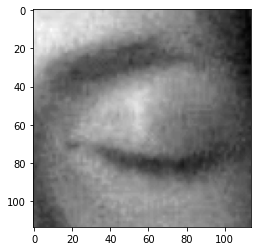

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(114, 114)

**Defining Image to Variable**

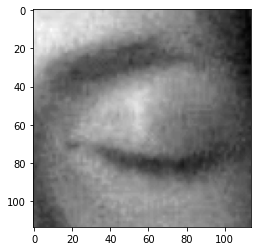

In [5]:
DataDirectory = "dataset/"
Classes = ["closed_eye","open_eye"]
for category in Classes:
    path = os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

**Resize Image**

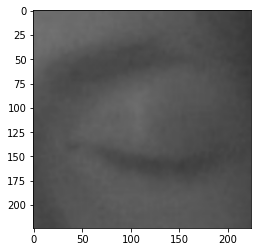

In [6]:
img_size = 224

new_array = cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(DataDirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [8]:
create_training_data()

In [9]:
print(len(training_data))

3223


In [10]:
import random
random.shuffle(training_data)

In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [12]:
X.shape

(3223, 224, 224, 3)

In [13]:
#normalize the data
X = X/255.0

In [14]:
Y = np.array(y)

In [15]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

**Model for Training**

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = tf.keras.applications.mobilenet.MobileNet()

In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

**Transfer Learning**

In [19]:
base_input = model.layers[0].input

In [20]:
base_output = model.layers[-4].output

In [21]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
#final_ouput = layers.Activation('sigmoid')(final_output)

In [22]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [23]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

**setting for Binary Classsification**

In [24]:
new_model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])

In [25]:
#new_model.fit(X,Y, epochs = 10, validation_split = 0.1)#

In [26]:
#new_model.save('my_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('my_model.h5')

**Checking the network for predictions**

In [ ]:
#img_array = cv2.imread("dataset/closed_eye/s0002_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)
img_array = cv2.imread("dataset/open_eye/s0001_01842_0_0_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

In [ ]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [ ]:
X_input.shape

In [ ]:
plt.imshow(new_array)

In [ ]:
X_input = X_input/255.0

In [ ]:
prediction = new_model.predict(X_input)

In [ ]:
prediction

**Check Unknown Image**

In [ ]:
img = cv2.imread('dataset/foto-tutup.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
eye_Cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
#faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eyeglasses.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
eyes = eye_Cascade.detectMultiScale(gray, 1.1, 4)

In [ ]:
for(x,y,w,h) in eyes :
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

**Cropping the eyes**

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi.shape

In [ ]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [ ]:
final_image.shape

In [ ]:
new_model.predict(final_image)

**Realtime Video Demo**

In [ ]:
# import cv2

# path = "haarcascade_frontalface_default.xml"
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# cap = cv2.VideoCapture(0)
# print('Success')
# #check if the webcam is opened correctly
# if not cap.isOpened():
#     print('failed')
#     cap = cv2.VideoCapture(1)
# if not cap.isOpened():
#     raise IOError("Cannot open webcam")

# while True:
#     ret, frame = cap.read()
#     eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     eyes = eye_cascade.detectMultiScale(gray,1.1,4)
#     for x,y,w,h in eyes:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
#         eyess = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess) == 0:
#             print("eyes are not detected")
#         else:
#             for (ex,ey,ew,eh) in eyess:
#                 eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

#         final_image = cv2.resize(eyes_roi, (244,244))
#         final_image = np.expand_dims(final_image, axis=0)
#         final_image = final_image/255.0

#         Predictions = new_model.predict(final_image)
#         if(Predictions > 0):
#             status = "Open Eyes"
#         else:
#             status = "Closed Eyes"

#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         print(faceCascade.empty())
#         faces = faceCascade.detectMultiScale(gray,1.1,4)


#         # Draw a rectangle arround the face
#         for(x, y, w, h) in faces:
#             cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

#         font = cv2.FONT_HERSHEY_SIMPLEX

#         # Use putText() method for
#         # Inserting text on video
#         cv2.putText(frame,
#                     status,
#                     (50, 50),
#                     font, 3,
#                     (0, 0, 255),
#                     2,
#                     cv2.LINE_4)
#         cv2.imshow('Eye closed|opened Detection',frame)

#         if cv2.waitKey(2) & 0xFF == ord('q'):
#             break
        
# cap.release()
# cv2.destroyAllWindows()

**Detecting abnormal blinking time**

In [ ]:
# import winsound
# import cv2
# import numpy as np

# frequency = 2500 #Set frequency to 2500 Hz
# duration = 1000 #Set Duration to 1000

# path = "haarcascade_frontalface_default.xml"
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# cap = cv2.VideoCapture(0)
# print('Success')
# #check if the webcam is opened correctly
# if not cap.isOpened():
#     print('failed')
#     cap = cv2.VideoCapture(1)
# if not cap.isOpened():
#     raise IOError("Cannot open webcam")

# counter = 0

# while True:
#     ret, frame = cap.read()
#     eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     eyes = eye_cascade.detectMultiScale(gray,1.1,4)
#     for x,y,w,h in eyes:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
#         eyess = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyess) == 0:
#             print("eyes are not detected")
#         else:
#             for (ex,ey,ew,eh) in eyess:
#                 eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         print(faceCascade.empty())
#         faces = faceCascade.detectMultiScale(gray,1.1,4)


#         # Draw a rectangle arround the face
#         for(x, y, w, h) in faces:
#             cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

#         font = cv2.FONT_HERSHEY_SIMPLEX
        
#         final_image = cv2.resize(eyes_roi, (244,244))
#         final_image = np.expand_dims(final_image, axis=0)
#         final_image = final_image/255.0

#         Predictions = new_model.predict(final_image)
#         if(Predictions > 0):
#             status = "Open Eyes"
#             cv2.putText(frame,
#                         status,
#                         (150, 150),
#                         font, 3,
#                         (0, 0, 255),
#                         2,
#                         cv2.LINE_4)
#             x1,y1,w1,h1 = 0,0,175,175
            
#             cv2.rectangle(frame, (x1, y1), (x1+w1, y1+h1), (0, 0, 0), -1)
#             cv2.putText(frame, 'Active', (x1 + int(w1/10),y1 +  int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
#         else:
#             counter = counter + 1
#             status = "Closed Eyes"

#             # Use putText() method for
#             # Inserting text on video
#             cv2.putText(frame,
#                         status,
#                         (150, 150),
#                         font, 3,
#                         (0, 0, 255),
#                         2,
#                         cv2.LINE_4)
#             cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 2)
#             if counter>10:

#                 x1,y1,w1,h1 = 0,0,175,175
#                 cv2.rectangle(frame, (x1, y1), (x1+w1, y1+h1), (0, 0, 0), -1)
#                 cv2.putText(frame, 'Sleep Alert !!', (x1 + int(w1/10),y1 +  int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
#                 winsound.Beep(frequency, duration)
#                 counter = 0
            
#             cv2.imshow("Drowsiness Detection", frame)
#             if cv2.waitKey(2) & 0xFF == ord('q'):
#                 break
        
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
import winsound
import cv2
import numpy as np

counter = 0

frequency = 2500 #Set frequency to 2500 Hz
duration = 1000 #Set Duration to 1000


path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
print('Success')
#check if the webcam is opened correctly
if not cap.isOpened():
    print('failed')
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

        final_image = cv2.resize(eyes_roi, (244,244))
        final_image = np.expand_dims(final_image, axis=0)
        final_image = final_image/255.0

        Predictions = new_model.predict(final_image)
        if(Predictions > 0):
            status = "Open Eyes"
            counter = 0
        else:
            counter = counter + 1
            status = "Closed Eyes"
            if counter>5:
                winsound.Beep(frequency, duration)
                counter = 0

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        print(faceCascade.empty())
        faces = faceCascade.detectMultiScale(gray,1.1,4)


        # Draw a rectangle arround the face
        for(x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # Use putText() method for
        # Inserting text on video
        cv2.putText(frame,
                    status,
                    (50, 50),
                    font, 3,
                    (0, 0, 255),
                    2,
                    cv2.LINE_4)
        cv2.imshow('Eye closed|opened Detection',frame)

        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()